<a href="https://colab.research.google.com/github/Isra1997/KNN-Spike-train-direction-classifier/blob/master/KNN_direction_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

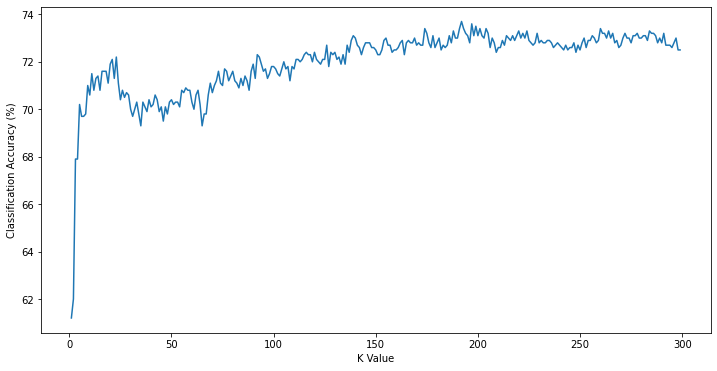

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def TrainingModel(Train_Angles,Train_TrianSpikes,Testing_Angles,Testing_SpikeTrains):

  X_train = Train_TrianSpikes.transpose()
  Y_train = Train_Angles

  X_test = Testing_SpikeTrains.transpose()
  Y_test = Testing_Angles

  labeled_Y_Train=np.zeros(Y_train.shape)
  labeled_Y_Test=np.zeros(Y_test.shape)

  # labelling the training dataset to the four directions ie:- 0° to 90°, 90° to 180°, 180° to 270° or 270° to 360°.
  for i in range(len(Y_train)):
      if(Y_train[i] >= 0 and Y_train[i] < 90):
        labeled_Y_Train[i]=1
      if(Y_train[i] >= 90 and Y_train[i] < 180):
        labeled_Y_Train[i]=2
      if(Y_train[i] >= 180 and Y_train[i] < 270):
        labeled_Y_Train[i]=3
      if(Y_train[i] >= 270 and Y_train[i] < 360):
        labeled_Y_Train[i]=4

  # labelling the training dataset to the four directions ie:- 0° to 90°, 90° to 180°, 180° to 270° or 270° to 360°.
  for i in range(len(Y_test)):
      if(Y_test[i] >= 0 and Y_test[i] < 90):
        labeled_Y_Test[i]=1
      if(Y_test[i] >= 90 and Y_test[i] < 180):
        labeled_Y_Test[i]=2
      if(Y_test[i] >= 180 and Y_test[i] < 270):
        labeled_Y_Test[i]=3
      if(Y_test[i] >= 270 and Y_test[i] < 360):
        labeled_Y_Test[i]=4

  error=[]

  for i in range(1,300):
    # training the kNN clasifier
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,labeled_Y_Train)
    Y_pred = classifier.predict(X_test)
    error.append(accuracy_score(labeled_Y_Test,Y_pred))

  error=np.multiply(error,100)
  plt.figure(figsize=(12, 6))
  plt.plot(range(1, 300), error)
  plt.title('')
  plt.xlabel('K Value')
  plt.ylabel('Classification Accuracy (%)')


def main():
  Angle_Training = np.loadtxt("Angle_Training.txt", skiprows=0)
  Training_SpikeTrains=np.loadtxt("Training_SpikeTrains.txt", skiprows=0)
  Angle_Testing = np.loadtxt("Angle_Testing.txt", skiprows=0)
  Testing_SpikeTrains=np.loadtxt("Testing_SpikeTrains.txt", skiprows=0)
  TrainingModel(Angle_Training,Training_SpikeTrains,Angle_Testing,Testing_SpikeTrains)

  
if __name__=='__main__':
  main()


